In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist, squareform

In [7]:
file_names = [
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHG.Col-0.wt.aerial-part.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHG.Col-0.wt.embryo.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHG.Col-0.wt.endosperm.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHG.Col-0.wt.immature-flower-buds.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHG.Col-0.wt.inflorescence.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHG.Col-0.wt.root.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHG.Col-0.wt.rosette.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHG.Col-0.wt.shoot.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHG.Col-0.wt.sperm-cell.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHG.Col-0.wt.vegetative-nucleus.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHG.Col-0.wt.whole-organism.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHH.Col-0.wt.aerial-part.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHH.Col-0.wt.embryo.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHH.Col-0.wt.endosperm.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHH.Col-0.wt.immature-flower-buds.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHH.Col-0.wt.inflorescence.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHH.Col-0.wt.root.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHH.Col-0.wt.rosette.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHH.Col-0.wt.shoot.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHH.Col-0.wt.sperm-cell.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHH.Col-0.wt.vegetative-nucleus.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CHH.Col-0.wt.whole-organism.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CpG.Col-0.wt.aerial-part.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CpG.Col-0.wt.embryo.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CpG.Col-0.wt.endosperm.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CpG.Col-0.wt.immature-flower-buds.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CpG.Col-0.wt.inflorescence.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CpG.Col-0.wt.root.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CpG.Col-0.wt.rosette.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CpG.Col-0.wt.shoot.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CpG.Col-0.wt.sperm-cell.csv",
    "/home/eharpu/shannon/shannonFiles5/output_metadata_CpG.Col-0.wt.vegetative-nucleus.csv",
    "/home/eharpu/shannon/shannonFiles4/output_metadata_CpG.Col-0.wt.whole-organism.csv",
]

new_file_names = [
    "/shares/grossniklaus.botinst.uzh/eharputluoglu/newShannonFilesDir/shannonFiles5/" + path.split('/')[-1]
    for path in file_names
]

file_names = new_file_names

dfs = [pd.read_csv(file_name, sep="\t") for file_name in file_names]

#combined_df = pd.read_csv("combined_df.csv")

In [8]:
interval_measurements = []

for df, context in zip(dfs, file_names):
    context_name = context.split('.')[-2] + "-" + ((context.split('/')[-1]).split('.')[0]).split('_')[-1]  
    #print(context_name)
    df['interval'] = df['start'].astype(str) + '-' + df['end'].astype(str)  
    context_measurement = df.set_index('interval')['JSD_bit_'].rename(context_name)
    interval_measurements.append(context_measurement)

In [9]:
combined_df = pd.DataFrame()

for series in interval_measurements:
    combined_df = combined_df.join(series, how='outer')


print(combined_df.index.name)  # This should output 'interval'

interval


In [2]:
#combined_df.to_csv("combined_df_chr5.csv")
combined_df = pd.read_csv("combined_df_chr5.csv")

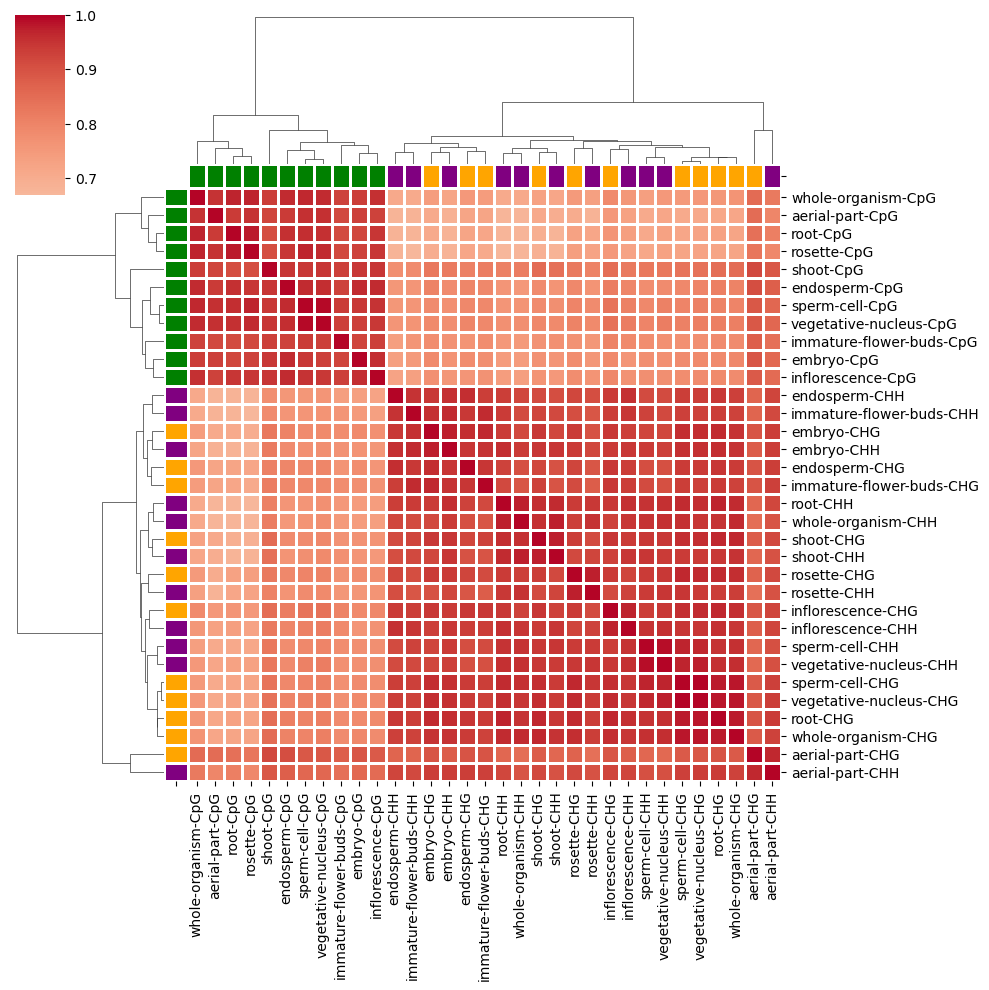

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


context_colors = {
    'CHG': 'orange',
    'CHH': 'purple',
    'CpG': 'green'
}

context_types = combined_df.columns.to_series().apply(lambda x: x.split('-')[-1])
col_colors = context_types.map(context_colors)

if 'interval' in combined_df.columns:
    combined_df.set_index('interval', inplace=True)

numeric_index = combined_df.index.str.split('-').str[0].astype(int)
combined_df.index = numeric_index

window_size = 100000
windowed_means = combined_df.groupby(combined_df.index // window_size).mean()

windowed_means.reset_index(drop=True, inplace=True)

correlation_matrix = windowed_means.corr(method='spearman', min_periods = 2)

#correlation_matrix.replace([np.inf, -np.inf], np.nan, inplace=True)

fig = sns.clustermap(correlation_matrix, 
                           center=0.5, cmap="coolwarm",
                           row_colors=col_colors, col_colors=col_colors,
                           linewidths=0.75, figsize=(10, 10))


plt.show()

In [ ]:
fig.savefig("ClusterMap_Chr5.png")